In [9]:
import numpy as np
import pandas as pd
from sklearn import neighbors, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
from sklearn.datasets import load_iris

In [52]:
penguin_ds = pd.read_csv('penguins.csv')

In [55]:
penguin_ds.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


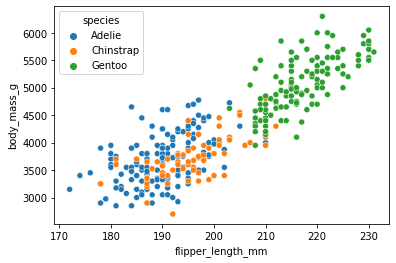

In [57]:
sns.scatterplot(x = "flipper_length_mm", y = "body_mass_g", data = penguin_ds, hue = "species");

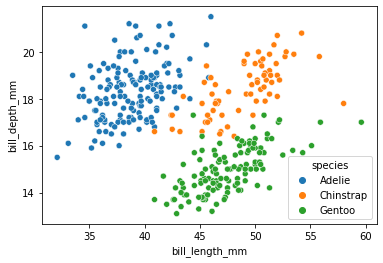

In [58]:
# Perfect for explaining KNN
sns.scatterplot(x = "bill_length_mm", y = "bill_depth_mm", data = penguin_ds, hue = "species");

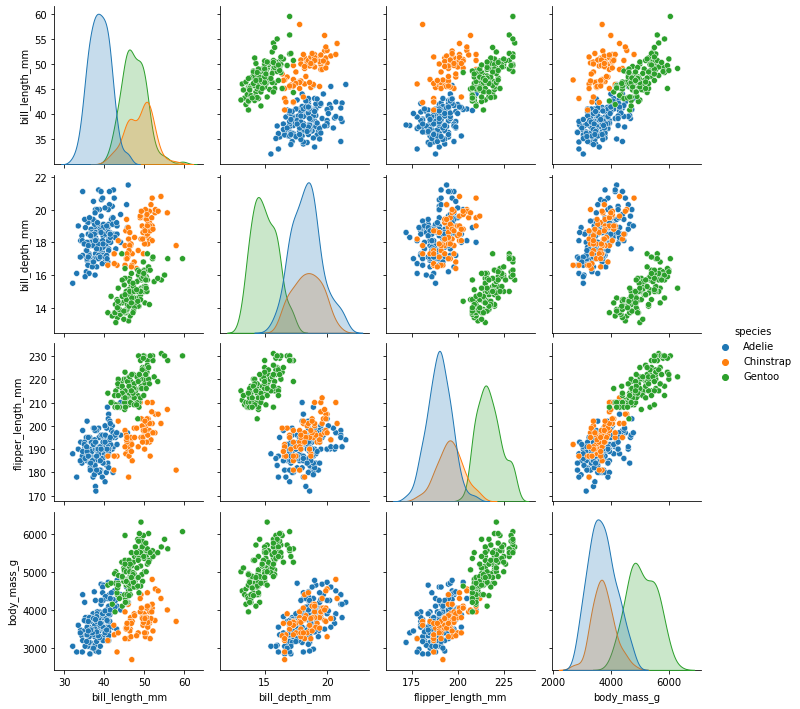

In [60]:
sns.pairplot(data = penguin_ds, hue = "species");

In [62]:
correlation_matrix = penguin_ds.corr()
correlation_matrix

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


In [64]:
penguin_ds.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
bill_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


In [69]:
penguin_ds.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

# Basics of machine Learning
<br>
Machine learning is about asking a specified algorithm to learn trends from historical data and reproduce/predict the trends in future instances.


## KNN

Advantages:
 - Supervised machine learning algorithm
 - Non-linear model
 - Superviseed learner for both Clasdsification and Regression
 - Fast and Interpretable

Disadvantages:
- Poor capactiy to adapt t highly complex relationships between independent and dependent variables
- At a certain point of complexity it becomes less effective than other models


Supervised neighbors-based learning algorithms have two distinct types: classification for data with discrete (categorical) labels, and regression for data with continuous (numerical) labels. [pasted from](https://scikit-learn.org/stable/modules/neighbors.html)

It works by first using a dataset to "train" itself, on the attributes within. The now trained algorithm then takes input of an unknown sample and attempts to classify it by finding a specified number of samples in the training data which neighbour it. It then uses the neighbouring data points to predict the label of the unknown. When selecting neighbouring data points to evaluatte 

In [2]:
header_list = ["Sex","Length","Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]

In [3]:
# Example of KNN using Abalone Dataset
abalone  = pd.read_csv('abalone.data.csv', names = header_list)
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
abalone = abalone.drop("Sex", axis = 1)


In [5]:
abalone.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
 correlation_matrix = abalone.corr()

In [7]:
correlation_matrix

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


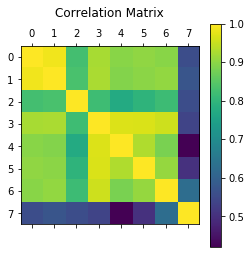

In [26]:
plt.matshow(abalone.corr())
plt.colorbar()
plt.title('Correlation Matrix', pad = 20.0)
plt.show();

In [34]:
graph_df = abalone[["Length","Height","Diameter","Rings"]]

In [35]:
graph_df

,Length,Height,Diameter,Rings
0,0.455,0.095,0.365,15
1,0.350,0.090,0.265,7
2,0.530,0.135,0.420,9
3,0.440,0.125,0.365,10
4,0.330,0.080,0.255,7
...,...,...,...,...
4172,0.565,0.165,0.450,11
4173,0.590,0.135,0.440,10
4174,0.600,0.205,0.475,9
4175,0.625,0.150,0.485,10


C:\Users\James\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\James\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\James\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


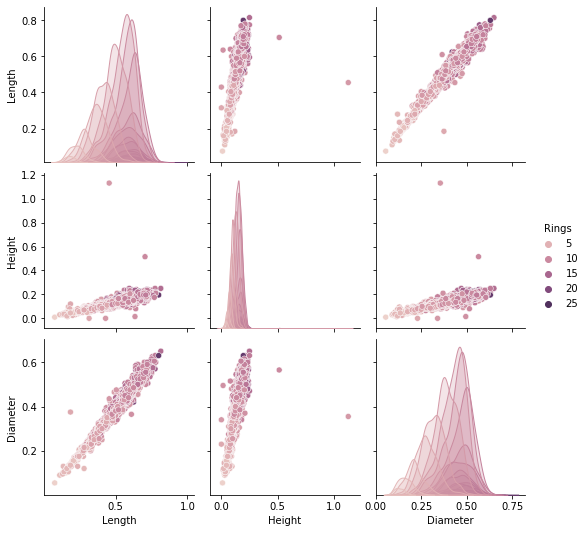

In [36]:
sns.pairplot(graph_df, hue= "Rings");

Refs:<br>
    [1] https://realpython.com/knn-python/